In [1]:
import pandas as pd
df = pd.read_excel("二分类.xlsx", sheet_name="1")
df  # 查看数据

,消防站,科教文化服务,医疗服务机构,体育服务场所,商业生活服务设施,政府服务部门,社会服务部门,充电站,公共交通站点,平均路宽,...,地上车位经营方式,地上车位经营方式_车位售价,地上车位经营方式_车位月租金,地上车位经营方式_待售车位数,地上车位经营方式_已售车位数,地上车位经营方式_待租车位数,地上车位经营方式_已租车位数,社区划线停车位数目,小区周边可停车,bq1
0,0,65,65.0,83,1022,56,81,25,16,14.084577,...,0,0,0,0,0,0,0,0,0,0
1,0,65,65.0,83,1022,56,81,25,16,14.084577,...,0,0,0,0,0,0,0,0,0,0
2,0,65,65.0,83,1022,56,81,25,16,14.084577,...,0,0,0,0,0,0,0,0,0,0
3,0,65,97.0,83,1022,56,81,25,16,14.084577,...,0,0,0,0,0,0,0,0,0,0
4,0,68,69.0,90,902,68,92,28,11,13.276097,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0,46,30.0,53,375,28,43,14,18,15.413226,...,2,0,300,0,0,0,206,0,0,0
1340,0,46,72.0,53,375,28,43,14,18,15.413226,...,2,0,300,0,0,0,206,0,0,0
1341,4,119,101.0,154,1665,71,99,23,4,19.764050,...,3,1,2000,350,525,350,0,0,0,0
1342,4,119,101.0,154,1665,71,99,23,4,19.764050,...,3,1,2000,350,525,350,0,0,0,0


In [3]:
df.isnull().sum()  # 检查到医疗服务机构有1个空值

消防站               0
科教文化服务            0
医疗服务机构            1
体育服务场所            0
商业生活服务设施          0
政府服务部门            0
社会服务部门            0
充电站               0
公共交通站点            0
平均路宽              0
平均人行道宽            0
平均路网密度            0
公园面积              0
人均公共绿地面积          0
绿地覆盖率             0
建成时间              0
住房类型              0
用地面积              0
建筑面积              0
容积率               0
人均用地面积            0
建筑占地面积            0
建筑密度              0
建筑数               0
房屋数               0
常住人口              0
60+人口数            0
小区停车设施类型          0
地上停车位             0
地下停车位             0
地上停车场_管理单位性质      0
地上车位经营方式          0
地上车位经营方式_车位售价     0
地上车位经营方式_车位月租金    0
地上车位经营方式_待售车位数    0
地上车位经营方式_已售车位数    0
地上车位经营方式_待租车位数    0
地上车位经营方式_已租车位数    0
社区划线停车位数目         0
小区周边可停车           0
bq1               0
dtype: int64

In [4]:
df['医疗服务机构'] = df['医疗服务机构'].fillna(df['医疗服务机构'].median())  # 用列的中值填补空缺

In [5]:
X = df.drop(columns=['bq1'])  # 构建特征
y = df['bq1']  # 构建标签

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)  # 创建SMOTE模型，设置随机种子保证结果可复现
X_resampled, y_resampled = smote.fit_resample(X, y)  # 应用SMOTE进行过采样，平衡数据集

c:\Users\24849\Desktop\多分类转二分类\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\24849\Desktop\多分类转二分类\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [7]:
y_resampled.value_counts()  # 查看过采样后的标签分布，确保数据平衡

bq1
0    1289
1    1289
Name: count, dtype: int64

In [8]:
# 分离训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

使用SSA优化超参数

In [9]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

In [10]:
# 定义一个用于评估XGBoost模型性能的函数
def evaluate_xgb(params, X_train, y_train):
    # 定义n_estimators和learning_rate的上下界
    n_estimators_min, n_estimators_max = 100, 1000
    learning_rate_min, learning_rate_max = 0.01, 0.3
    
    # 根据参数进行线性映射，将输入的params值映射到实际的n_estimators和learning_rate范围内
    n_estimators = int(params[0] * (n_estimators_max - n_estimators_min)) + n_estimators_min
    learning_rate = params[1] * (learning_rate_max - learning_rate_min) + learning_rate_min

    # 构建XGBoost模型，使用binary:logistic作为目标函数（适合二分类问题），评估指标为logloss
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
                          objective="binary:logistic", eval_metric="logloss")
    
    # 使用交叉验证（3折）来评估模型的准确率
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    
    # 计算交叉验证的平均准确率
    mean_accuracy = cv_scores.mean()

    # 返回平均准确率作为适应度
    return mean_accuracy


# 定义麻雀搜索算法（SSA）的实现
def sparrow_search_algorithm(X_train, y_train, population_size, max_iterations):
    # 参数维度：n_estimators 和 learning_rate，因此为2
    param_dim = 2
    
    # 随机初始化麻雀群体的位置，每个位置对应一个候选解（超参数组合）
    sparrow_positions = np.random.uniform(low=0, high=1, size=(population_size, param_dim))
    
    # 设置觅食者的比例（前20%作为觅食者）
    num_producers = int(0.2 * population_size)
    
    # 定义安全阈值（ST）和扰动阈值（DT）
    ST = 0.8  # 逃避捕食者的安全阈值
    DT = 0.5  # 扰动阈值（决定跟随者的行为）

    # 初始化群体的适应度值，通过evaluate_xgb函数计算每个候选解的准确率（适应度）
    fitness = np.array([evaluate_xgb(individual, X_train, y_train) for individual in sparrow_positions])
    
    # 根据适应度进行排序，找到适应度较高的个体（越高越好）
    sorted_indices = np.argsort(fitness)[::-1]  # 适应度降序排列
    sorted_positions = sparrow_positions[sorted_indices]  # 根据排序结果调整群体顺序

    # 进入迭代过程，进行多次更新和进化
    for iteration in range(max_iterations):
        # 更新觅食者的位置（前20%的个体）
        for i in range(num_producers):
            r1 = np.random.rand()  # 生成随机数r1，决定觅食者或跟随者是否选择某一行为
            r2 = np.random.rand()  # 生成随机数r2，决定执行某一行为的程度
            if r1 < ST:
                # 当r1小于ST时，觅食者接近当前全局最优个体
                sorted_positions[i] += r2 * (sorted_positions[0] - sorted_positions[i])
            else:
                # 否则，觅食者在当前位置附近随机搜索
                sorted_positions[i] += np.random.uniform(-1, 1) * np.ones_like(sorted_positions[i])

        # 更新跟随者的位置（剩下的80%个体）
        for i in range(num_producers, population_size):
            r1 = np.random.rand()
            r2 = np.random.rand()
            if r1 < DT:
                # 当r1小于DT时，跟随者向某个随机选择的觅食者靠拢
                sorted_positions[i] += r2 * (sorted_positions[(np.random.randint(0, num_producers))] - sorted_positions[i])
            else:
                # 否则，跟随者随机地远离最差个体
                sorted_positions[i] += r2 * (sorted_positions[i] - sorted_positions[-1])

        # 确保群体的位置（参数值）在合法范围内（[0, 1]之间）
        sorted_positions = np.clip(sorted_positions, [0, 0], [1, 1])

        # 再次评估整个群体的适应度，计算每个个体的准确率
        fitness = np.array([evaluate_xgb(individual, X_train, y_train) for individual in sparrow_positions])
        
        # 根据新的适应度对群体进行排序
        sorted_indices = np.argsort(fitness)[::-1]
        sorted_positions = sparrow_positions[sorted_indices]

    # 返回最佳的超参数组合（适应度最高的个体）
    best_params = sorted_positions[0]
    best_fitness = np.max(fitness)
    return best_params, best_fitness


In [11]:
best_params, best_fitness = sparrow_search_algorithm(X_train, y_train, population_size=10, max_iterations=1)
# 之后max_iteration改成50，population_size改为20

In [12]:
best_params, best_fitness

(array([0.11987342, 0.91005081]), np.float64(0.9612015221782156))

In [13]:
n_estimators = int(best_params[0] * 900) + 100  # 树的数量从0-1之间映射到100-1000
learning_rate = best_params[1] * 0.29 + 0.01  # 学习率从0-1之间映射到0.01-0.3
n_estimators, learning_rate  

(207, np.float64(0.2739147348835779))

In [14]:
model = XGBClassifier(random_state=42, objective="binary:logistic", eval_metric='logloss', 
                      n_estimators=n_estimators, learning_rate=learning_rate)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# 使用交叉验证来评估模型表现
xgb_cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
xgb_mean_accuracy = xgb_cv_scores.mean()
xgb_mean_accuracy

np.float64(0.9612015221782156)

In [16]:
# 使用验证报告查看模型表现各项指标
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       245
           1       0.96      0.96      0.96       271

    accuracy                           0.96       516
   macro avg       0.96      0.96      0.96       516
weighted avg       0.96      0.96      0.96       516



显示最重要的特征

In [17]:
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

SHAP

In [18]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_values

c:\Users\24849\Desktop\多分类转二分类\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


.values =
array([[-0.13200311,  0.17489432, -0.20704803, ...,  0.7024455 ,
         0.09047137,  0.26317787],
       [ 0.11162416,  0.0832635 , -0.9530274 , ..., -2.6142998 ,
        -0.02507952, -1.2256378 ],
       [ 0.24910581,  0.04104321, -1.0465968 , ...,  0.15268032,
        -0.00470726,  0.21571507],
       ...,
       [ 0.08459195,  0.01420874, -0.35183662, ...,  0.25486574,
         0.0277523 ,  0.3809309 ],
       [ 0.10974423,  0.19449416, -0.20329598, ...,  0.16433905,
         0.03565004,  0.18290234],
       [ 0.2581104 ,  0.0572885 , -0.03732847, ...,  0.4381663 ,
         0.38019863,  0.5046735 ]], dtype=float32)

.base_values =
array([-0.15901089, -0.15901089, -0.15901089, -0.15901089, -0.15901089,
       -0.15901089, -0.15901089, -0.15901089, -0.15901089, -0.15901089,
       -0.15901089, -0.15901089, -0.15901089, -0.15901089, -0.15901089,
       -0.15901089, -0.15901089, -0.15901089, -0.15901089, -0.15901089,
       -0.15901089, -0.15901089, -0.15901089, -0.15901089,

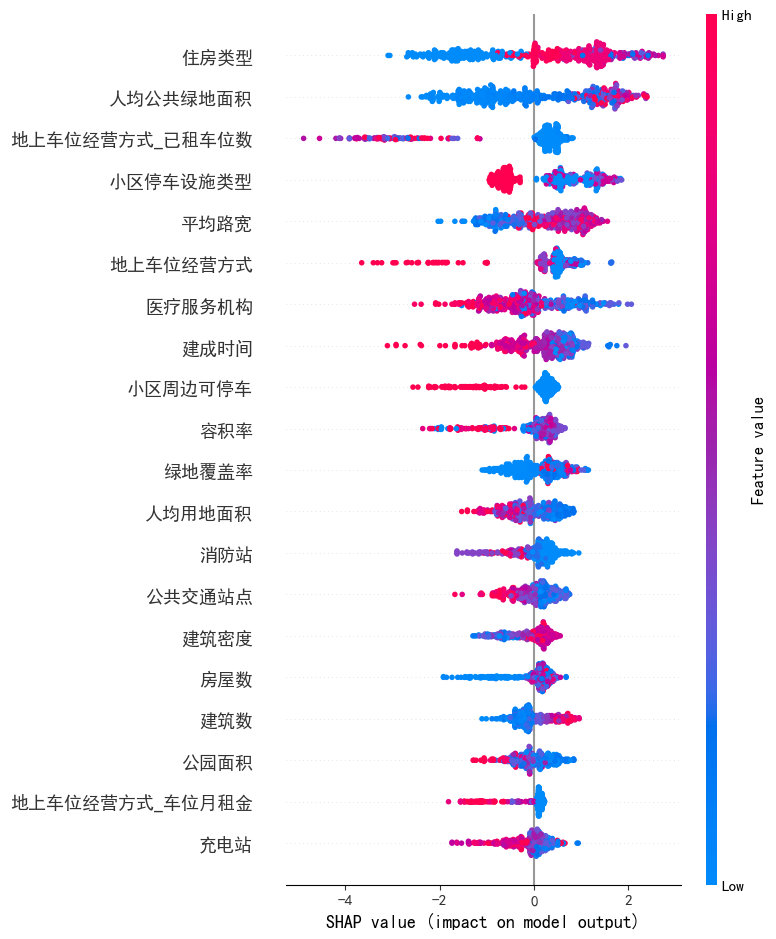

In [19]:
# 常见的总结图
shap.summary_plot(shap_values, X_test)
# 每个特征行上的点代表不同的数据样本。
# 越靠上的特征对结果影响越大。
# 每个点的颜色代表特征值的大小：红色：特征值较高。蓝色：特征值较低。
# x轴显示的是SHAP值，表示该特征对模型输出的影响程度
#     SHAP 值越大（正）：表示该特征正向推动模型预测的结果
#     SHAP 值越小（负）：表示该特征负向推动模型预测的结果
# 红点靠右（高 SHAP 值）：表示该特征的高值对预测结果有正向推动
# 蓝点靠左（负 SHAP 值）：表示该特征的低值对预测结果有负向影响

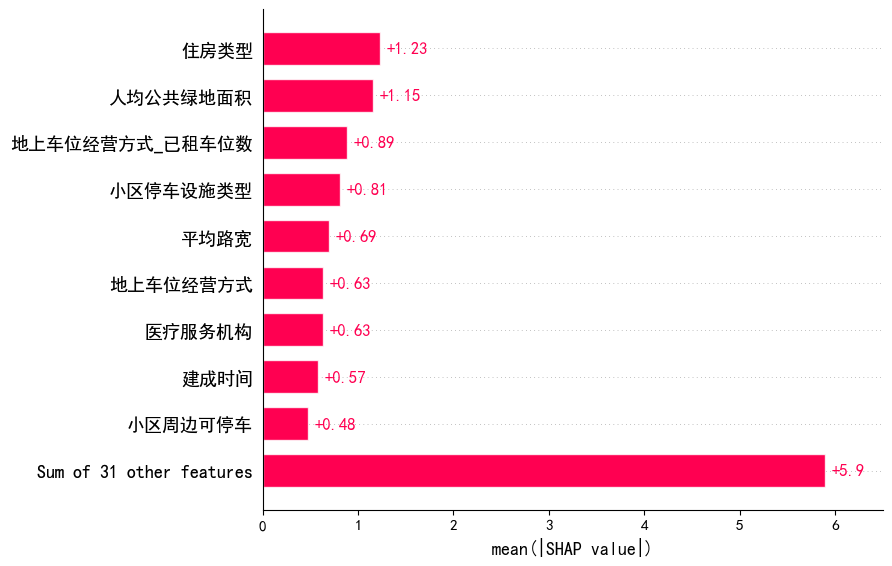

In [20]:
# 柱状图，展示每个特征对模型整体预测的平均影响（按绝对值排序）
shap.plots.bar(shap_values)

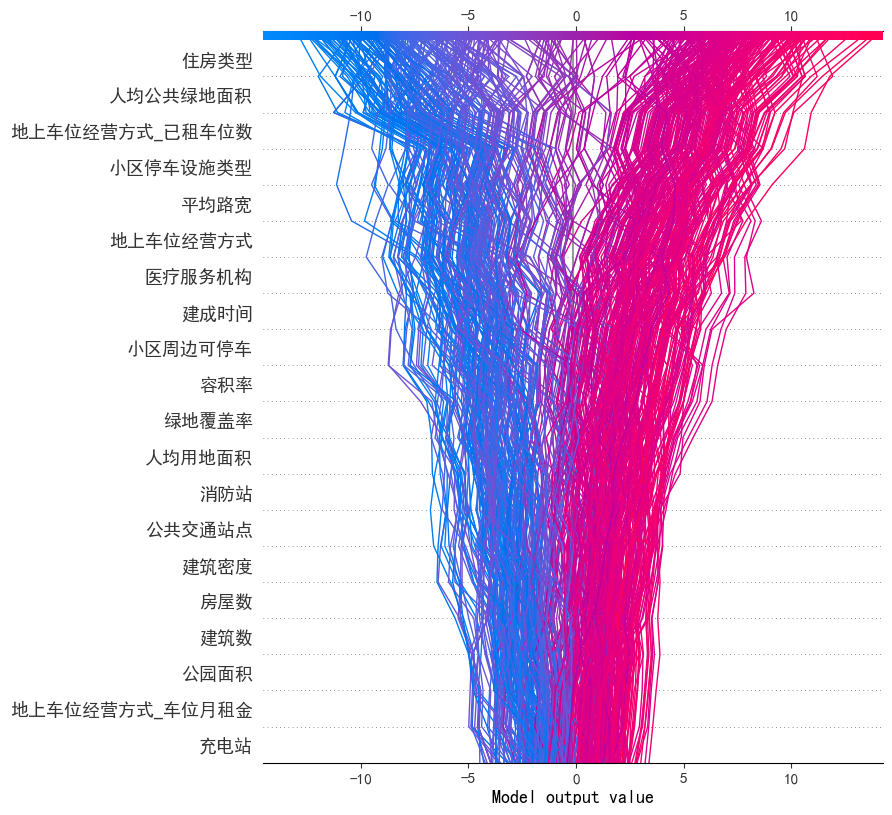

In [21]:
# 展示模型预测的决策路径，展示多步的特征影响如何最终决定预测结果
shap.decision_plot(explainer.expected_value, explainer.shap_values(X_test), X_test)

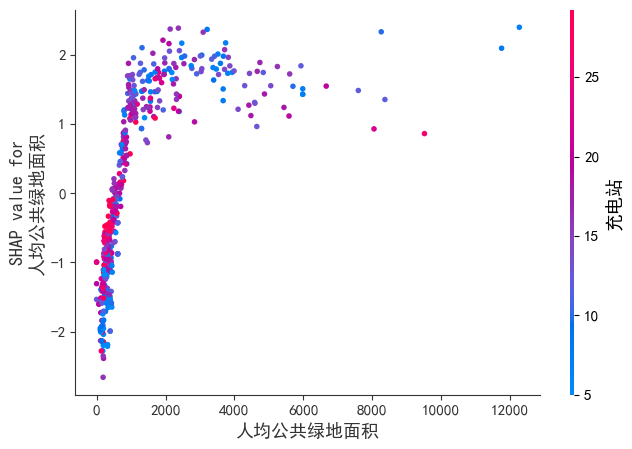

In [22]:
# 这个图展示了一个特征的SHAP值如何随该特征的值变化。颜色可以用来展示另一个与其有交互作用的特征。
shap.dependence_plot('人均公共绿地面积', explainer.shap_values(X_test), X_test)